##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gender Classifer Based On Hand Image (CNN)

### Import TensorFlow

In [23]:
import tensorflow as tf
import pathlib
import PIL

#from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/StatMLFinalProj/GenderResizedHands512'
testPath = '/content/drive/MyDrive/StatMLFinalProj/GenderResizedHands512/Male'
testDir = pathlib.Path(testPath)
data_dir = pathlib.Path(drive_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Verify Images




4081


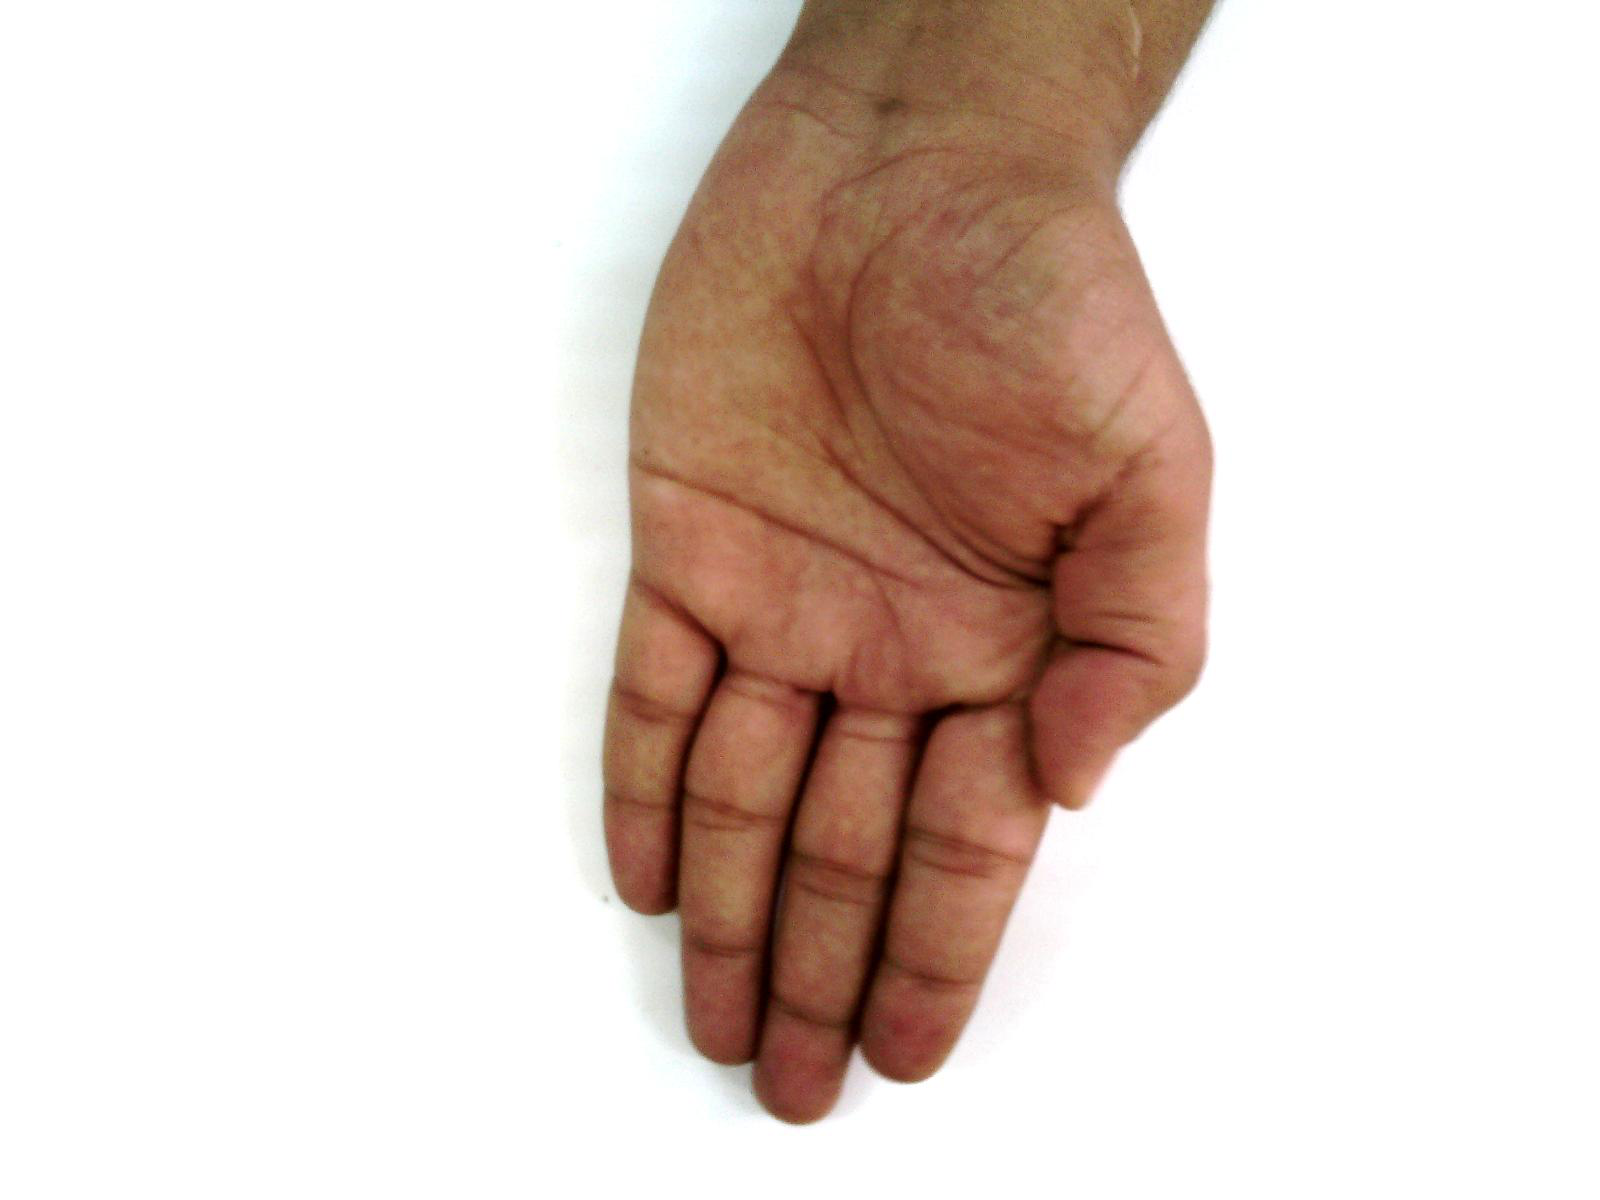

In [24]:
imageCount = len(list(testDir.glob('*.jpg')))
print(imageCount)
images = list(testDir.glob('*.jpg'))
PIL.Image.open(str(images[0]))

###Image Params



In [25]:
imageHeight = 512
imageWidth = 512
batch_size = 32

### Data Sets


####Training dataset



In [26]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  labels='inferred',
  seed=123,
  image_size=(imageHeight, imageWidth),
  batch_size=batch_size)

Found 11420 files belonging to 2 classes.
Using 9136 files for training.


####Validation dataset


In [27]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  labels='inferred',
  seed=123,
  image_size=(imageHeight, imageWidth),
  batch_size=batch_size)

Found 11420 files belonging to 2 classes.
Using 2284 files for validation.


####Checking class names

In [28]:
classNames = train_dataset.class_names
print(classNames)

['Female', 'Male']


####Checking multiple images and labels

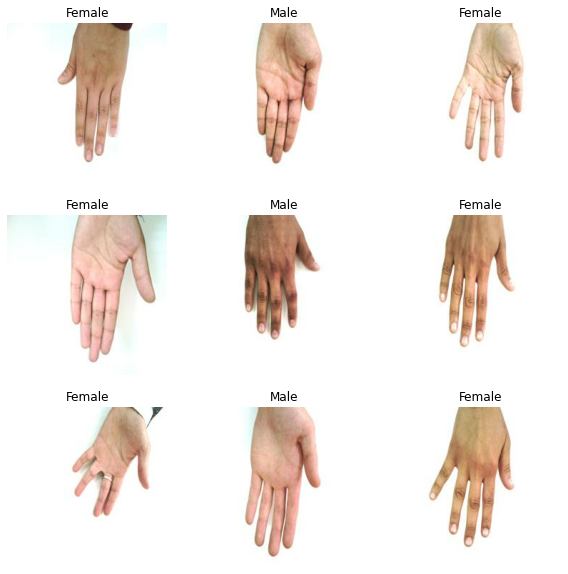

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classNames[labels[i]])
    plt.axis("off")

####Rescale Images to have each pixel take on a value between 0 and 1

In [29]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)
#normLayer = layers.Rescaling(1./255)

####Create Model


In [30]:
numClasses = 2


model = models.Sequential()
model.add(layers.Rescaling(1./255, input_shape=(imageHeight, imageWidth, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2, name='dropout_1'))
#model.add(layers.Dense(512, activation='relu'))
#model.add(layers.Dropout(0.2, name='dropout_2'))
#model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

#model = models.Sequential()
#layer zero
#odel.add(layers.Rescaling(1./255, input_shape=(imageHeight, imageWidth, 3)))

# layer one
#model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(224, 224, 3), name='conv1_1'))
#model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu',name='conv1_2'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2), name='max_pooling2d_1'))

# layer two
#model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', name='conv2_1'))
#model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', name='conv2_2'))
#model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), name='max_pooling2d_2'))

# layer three
#model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(224,224,3), name='conv3_1'))
#model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu',name='conv3_2'))
#model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu',name='conv3_3'))
#model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), name='max_pooling2d_3'))

# layer four
#model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(224,224,3), name='conv4_1'))
#model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu',name='conv4_2'))
#model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu',name='conv4_3'))
#model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), name='max_pooling2d_4'))

# layer five
#model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(224,224,3), name='conv5_1'))
#model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu',name='conv5_2'))
#model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu',name='conv5_3'))
#odel.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), name='max_pooling2d_5'))

# adding three connected layers
#model.add(layers.Flatten(name='flatten'))
#model.add(layers.Dense(4096, activation='relu', name='fc_1'))
#model.add(layers.Dropout(0.5, name='dropout_1'))
#model.add(layers.Dense(1024, activation='relu', name='fc_2'))
#model.add(layers.Dropout(0.5, name='dropout_4'))
#model.add(layers.Dense(64, activation='relu', name='fc_3'))
#model.add(layers.Flatten(name='flatten2'))
#model.add(layers.Dense(1, activation='sigmoid', name='output'))

#model.add(layers.Flatten())
#model.add(layers.Dense(units=4096,activation="relu"))
#model.add(layers.Dropout(0.5, name='dropout_1'))
#model.add(layers.Dense(units=512,activation="relu"))
#model.add(layers.Dropout(0.5, name='dropout_4'))
#model.add(layers.Dense(units=2, activation="sigmoid"))

####Compile Model

In [31]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)

model.compile(optimizer=opt,
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])


In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 512, 512, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 510, 510, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 255, 255, 64)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 253, 253, 128)     73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 126, 126, 128)    0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 124, 124, 128)    

####Train


In [ ]:
epochs=10
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

#from keras.callbacks import ModelCheckpoint, EarlyStopping
#checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
#early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
#history = model.fit_generator(steps_per_epoch=100,generator=train_dataset, validation_data= validation_dataset, validation_steps=10,epochs=100,callbacks=[checkpoint,early])

Epoch 1/10


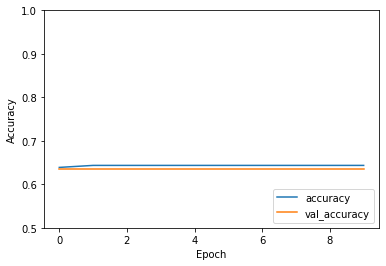

In [ ]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
#acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

#loss = history.history['loss']
#val_loss = history.history['val_loss']

#epochs_range = range(epochs)

#plt.figure(figsize=(8, 8))
#plt.subplot(1, 2, 1)
#plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
#plt.legend(loc='lower right')
#plt.title('Training and Validation Accuracy')

#plt.subplot(1, 2, 2)
#plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
#plt.legend(loc='upper right')
#plt.title('Training and Validation Loss')
#plt.show()

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 6s 0us/step


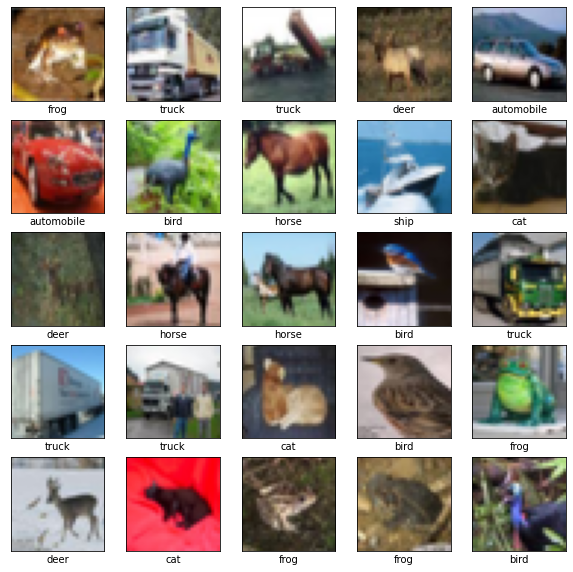

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.


In [ ]:
model = models.Sequential()
# layer one
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# layer two
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# layer three
model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# layer four
model.add(layers.Conv2D(512, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# layer five
model.add(layers.Conv2D(512, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))



In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)

model.compile(optimizer=opt,
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

Let's display the architecture of your model so far:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                  

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [ ]:
# adding three connected layers
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(4096, activation='relu', name='fc_1'))
model.add(layers.Dropout(0.5, name='dropout_1'))
model.add(layers.Dense(4096, activation='relu', name='fc_2'))
model.add(layers.Dropout(0.5, name='dropout_4'))
model.add(layers.Dense(1000, activation='softmax', name='output'))

Here's the complete architecture of your model:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                  

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


ValueError: ignored

### Evaluate the model

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

Your simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code! For another CNN style, check out the [TensorFlow 2 quickstart for experts](https://www.tensorflow.org/tutorials/quickstart/advanced) example that uses the Keras subclassing API and `tf.GradientTape`.